## Problem Statement

### A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurers' management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoking, health conditions and others. Insurance companies apply numerous techniques for analysing and predicting health insurance costs

### Data Definition
*	age: Age of the policyholder (Numeric)
*	sex: Gender of the policyholder (Categoric)
*	weight: Weight of the policyholder (Numeric)
*	BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)
*	no_of_dependents: Number of dependent persons on the policyholder (Numeric)
*	smoker: Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)
*	claim: The amount claimed by the policyholder (Numeric) in dollars
*	blood pressure: Blood pressure reading of policyholder (Numeric)
*	diabetes: Indicates policyholder suffers from diabetes or not (non-diabetic=0; diabetic=1) (Categoric)
*	regular_ex: A policyholder regularly exercises or not (no-exercise=0; exercise=1) (Categoric)
*	job_title: Job profile of the policyholder (Categoric)
*	city: The city in which the policyholder resides (Categoric) 
*	hereditary_diseases: A policyholder suffering from hereditary diseases or not (Categoric)*

In [ ]:
# from bmi we can find height w.r.t to weight

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

plt.rcParams['figure.figsize']=[15,6]

In [72]:
df=pd.read_csv('healthinsurance.csv')

In [73]:
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


# Roadap head
* Univariate analysis
* Bivariate analysis
* Missing Values if any
* Outlier Analysis - IN insurance we donot remove the outliers
* Feature Engineering

### Model Buildig
* Split the data into train and test
* Statistical Model of linear regression - R2,MAE,MSE,RMSE & MAPE
* Using sklearn - Riddge,Lasso,Enet, SGD
* Cross validation model

In [74]:
# Shape ans info
df.shape

(15000, 13)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


### Note:We need to convert the smoker and regualr Ex in object

### Univariate analysis

In [76]:
df.select_dtypes(include=np.number).columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'bloodpressure',
       'diabetes', 'regular_ex', 'claim'],
      dtype='object')

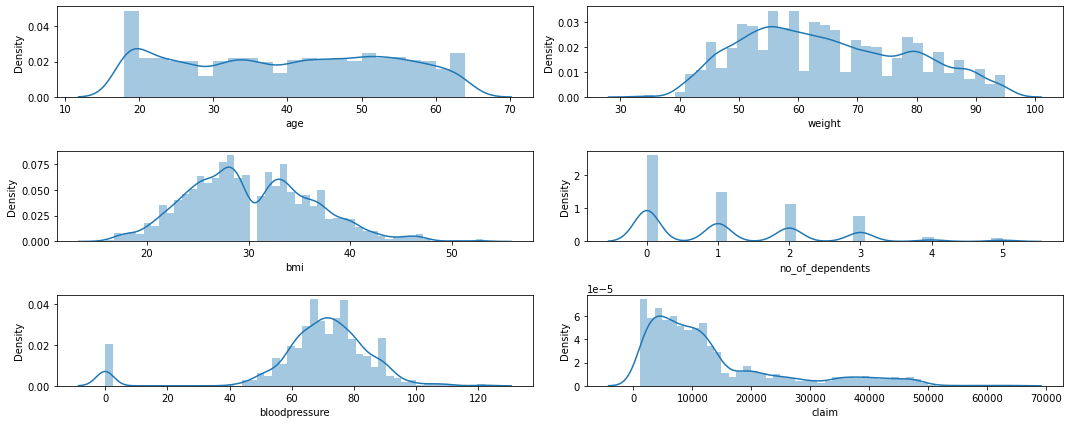

In [77]:
num_cols=['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim']  # removing smoker and regular_ex
nrows=3
ncols=2
iterator=1
for i in num_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.distplot(df.loc[:,i])
    iterator+=1 
    
plt.tight_layout()
plt.show()

* Age is unifromly disributed
* BMI appears to be Bimodal in Nature
* Weight is also somewhat normal in shape
* No of dependents vary from 0 to 5
* Bloodpressure,although is normal however, there are lost of 0s
* Claim is Positively Skewed

In [78]:
df.select_dtypes(exclude=np.number).columns

Index(['sex', 'hereditary_diseases', 'city', 'job_title'], dtype='object')

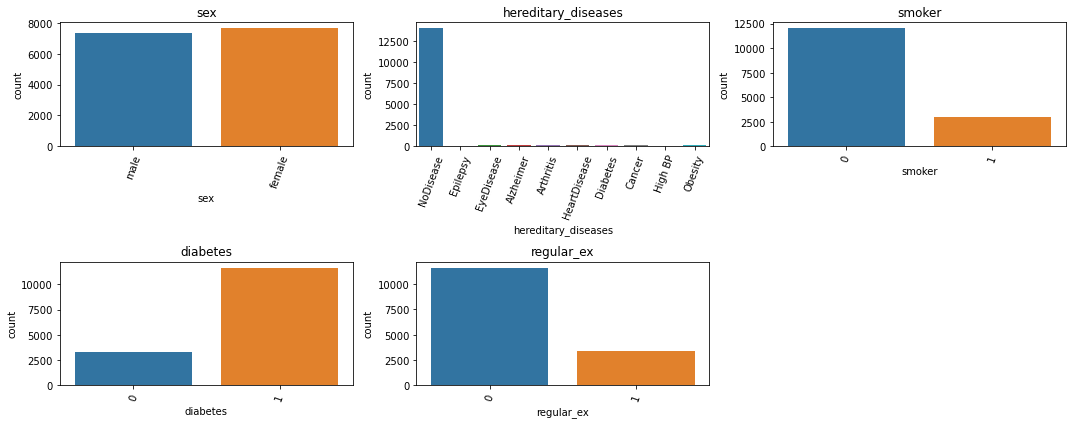

In [79]:
cat_cols=['sex', 'hereditary_diseases','smoker','diabetes','regular_ex']
nrows=2
ncols=3
iterator=1
for i in cat_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.countplot(df.loc[:,i])
    plt.title(i)
    plt.xticks(rotation=70)
    iterator+=1 
    
plt.tight_layout()
plt.show()

* More female than males
* Most of the people who got the insurance are diabetic mostly
* People as per this data are not smokers
* Most of the people dont have any hereditary diseases
* People dont excercise => High BMI ad More Weight

In [80]:
# Check Job title
df.job_title.value_counts().sort_values(ascending=False)[:5].index

Index(['Student', 'HomeMakers', 'Singer', 'Actor', 'FilmMaker'], dtype='object')

In [81]:
# Check Cities
df.city.value_counts().sort_values(ascending=False)[:5].index

Index(['NewOrleans', 'Nashville', 'Charleston', 'Brimingham', 'Memphis'], dtype='object')

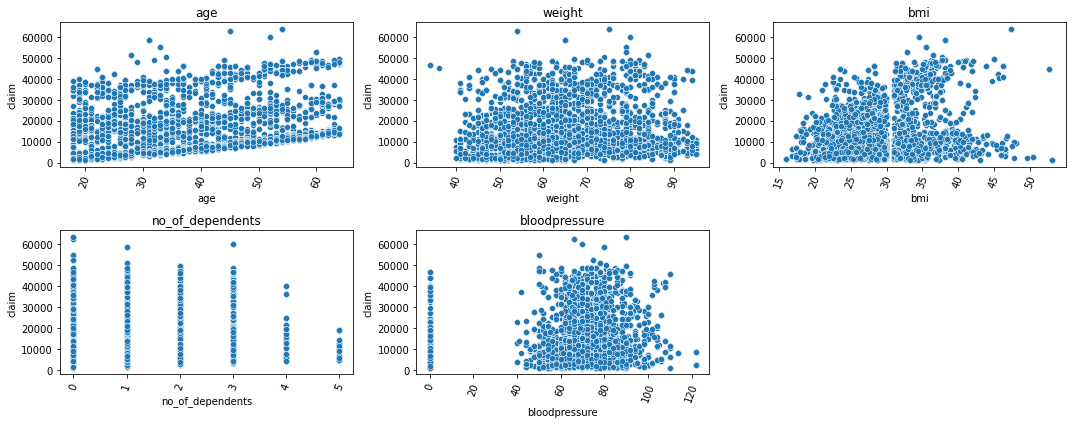

In [82]:
# Bivariate analysis - Num vs NUM

num_cols1=['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure'] # without claim beacuse it is a target variable
nrows=2
ncols=3
iterator=1
for i in num_cols1:
    plt.subplot(nrows,ncols,iterator)
    sns.scatterplot(df.loc[:,i],df['claim'])
    plt.title(i)
    plt.xticks(rotation=70)
    iterator+=1 
    
plt.tight_layout()
plt.show()

* As the age increases, Claaims also increase
* As BMI increases, the Claim amounts have an inceasing pattern
* In case of no of dependends, as the dependents increases, the claim amount decreases
* In Blood pressure, we have plots of 0s.. we need to fix that
* Between the weight and claim, thers is no pattern

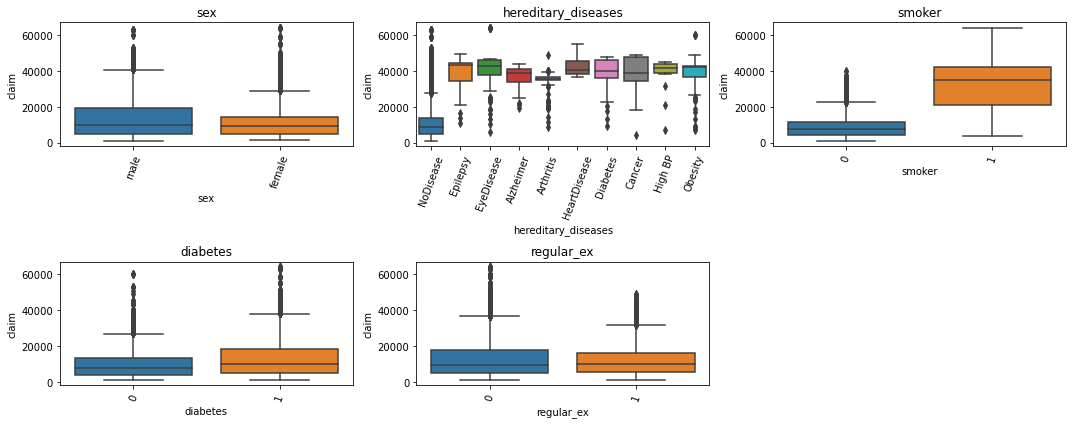

In [83]:
# Bivariate analysis - Num vs Cat

cat_cols=['sex', 'hereditary_diseases','smoker','diabetes','regular_ex'] # without claim beacuse it is a target variable
nrows=2
ncols=3
iterator=1
for i in cat_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.boxplot(df.loc[:,i],df['claim'])
    plt.title(i)
    plt.xticks(rotation=70)
    iterator+=1 
    
plt.tight_layout()
plt.show()

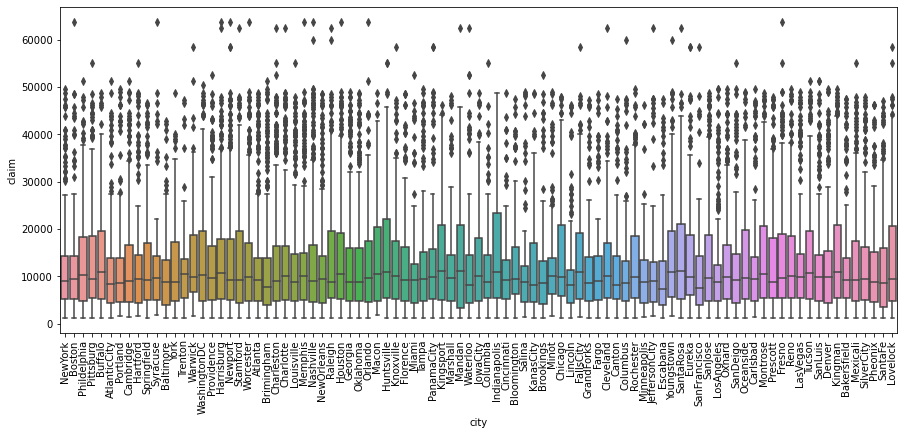

In [84]:
# City vs Claim
sns.boxplot(df.city,df.claim)  # unable to decode
plt.xticks(rotation=90)
plt.show()

In [85]:
len(df.city.unique()) 

91

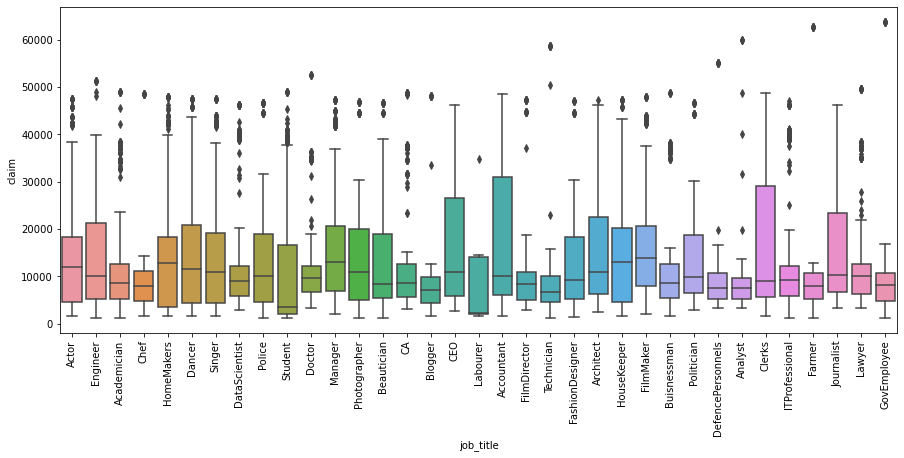

In [86]:
# job title vs claim
sns.boxplot(df.job_title,df.claim)  # unable to decode
plt.xticks(rotation=90)
plt.show()

In [87]:
df.job_title.unique()

array(['Actor', 'Engineer', 'Academician', 'Chef', 'HomeMakers', 'Dancer',
       'Singer', 'DataScientist', 'Police', 'Student', 'Doctor',
       'Manager', 'Photographer', 'Beautician', 'CA', 'Blogger', 'CEO',
       'Labourer', 'Accountant', 'FilmDirector', 'Technician',
       'FashionDesigner', 'Architect', 'HouseKeeper', 'FilmMaker',
       'Buisnessman', 'Politician', 'DefencePersonnels', 'Analyst',
       'Clerks', 'ITProfessional', 'Farmer', 'Journalist', 'Lawyer',
       'GovEmployee'], dtype=object)

In [88]:
# to change the cat to num column using the encoding
# if we are unable to find the pattern do a target encoding or frequency encoding
# Bin the job title with target

df.groupby('job_title')['claim'].describe()

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Academician,306.0,13097.379085,12504.444060,1121.9,5240.800,8538.30,12638.200,48885.1
Accountant,368.0,16320.152717,13925.395283,1627.3,6128.800,9957.70,30942.200,48549.2
Actor,720.0,13944.422917,11231.062831,1534.3,4673.400,11882.00,18310.700,47403.9
Analyst,255.0,8787.665098,7865.959422,3238.4,5267.800,7627.00,9625.900,60021.4
Architect,365.0,16710.670411,13374.433926,2457.5,6361.000,10825.30,22478.600,47352.4
Beautician,385.0,12809.675584,11206.231014,1261.9,5385.300,8310.80,18903.500,46718.2
Blogger,281.0,8577.109253,8750.659925,1622.2,4402.200,7046.70,9880.100,48173.4
Buisnessman,242.0,14248.269421,13323.382176,1631.7,5328.625,8534.70,12629.900,48824.5
CA,272.0,14072.912868,12888.841063,3171.6,5594.900,8522.00,12622.200,48673.6


In [89]:
# target encoding basis median for job_title
a=df.groupby('job_title')['claim'].median().to_dict()
a

{'Academician': 8538.3,
 'Accountant': 9957.7,
 'Actor': 11882.0,
 'Analyst': 7627.0,
 'Architect': 10825.3,
 'Beautician': 8310.8,
 'Blogger': 7046.7,
 'Buisnessman': 8534.7,
 'CA': 8522.0,
 'CEO': 10807.5,
 'Chef': 8026.7,
 'Clerks': 8964.1,
 'Dancer': 11454.0,
 'DataScientist': 9030.3,
 'DefencePersonnels': 7623.5,
 'Doctor': 9583.9,
 'Engineer': 10097.0,
 'Farmer': 7933.15,
 'FashionDesigner': 9290.1,
 'FilmDirector': 8342.9,
 'FilmMaker': 13937.7,
 'GovEmployee': 8233.1,
 'HomeMakers': 12914.0,
 'HouseKeeper': 12949.2,
 'ITProfessional': 9222.4,
 'Journalist': 10197.8,
 'Labourer': 2219.5,
 'Lawyer': 10085.9,
 'Manager': 12928.8,
 'Photographer': 10942.1,
 'Police': 10051.8,
 'Politician': 9890.55,
 'Singer': 11013.7,
 'Student': 3597.6,
 'Technician': 6666.2}

In [90]:
# Replacing job title with median values
df['job_title']=df['job_title'].map(a)

In [91]:
# target encoding basis median for city column
b=df.groupby('city')['claim'].median().to_dict()

# Replacing job title with median values
df['city']=df['city'].map(b)

In [94]:
# Missing values
df.isnull().sum()[df.isnull().sum()!=0]

age    396
bmi    956
dtype: int64

In [98]:
# Pull the dataframe where the age is missing
df.loc[df.age.isnull()].head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
76,NaN,female,88,29.6,NoDisease,1,0,10597.4,78,0,0,11013.7,3947.4
82,NaN,female,64,24.6,NoDisease,2,0,9861.0,70,0,1,9030.3,4529.5
105,NaN,female,73,20.2,NoDisease,2,0,8798.6,74,0,0,10807.5,4906.4
106,NaN,female,71,21.8,NoDisease,1,1,10577.1,84,1,0,11013.7,16657.7
110,NaN,female,70,34.3,NoDisease,5,0,8824.2,82,1,0,7627.0,8596.8


In [99]:
df.groupby('sex')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,7387.0,39.361040,14.111861,18.0,26.0,40.0,51.5,64.0
male,7217.0,39.738395,13.915518,18.0,27.0,40.0,52.0,64.0


In [102]:
# Missing values basis on gender
df.loc[(df.sex=='male') & (df.age.isnull()),'age']=40
df.loc[(df.sex=='female') & (df.age.isnull()),'age']=40

In [104]:
# Bmi
df.loc[df.bmi.isnull()].head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
8,63.0,male,55,NaN,NoDisease,0,0,9557.85,70,1,0,11454.00,13390.6
56,46.0,female,68,NaN,NoDisease,2,0,10959.50,60,1,0,11454.00,8825.1
60,41.0,male,82,NaN,NoDisease,2,0,8283.70,62,1,0,9890.55,7256.7
63,45.0,male,60,NaN,NoDisease,2,0,8871.20,86,1,0,11882.00,8413.5
74,18.0,female,44,NaN,NoDisease,0,0,9744.80,96,1,0,10942.10,21344.9


In [105]:
# regular ex,gender
df.groupby(['sex','regular_ex'])['bmi'].describe()

count       mean       std   min   25%   50%   75%   max
sex    regular_ex                                                           
female 0           5714.0  29.820791  6.054685  16.8  25.4  28.8  33.8  48.1
       1           1551.0  29.761702  5.721222  17.3  25.5  29.0  33.3  49.6
male   0           5211.0  31.024717  6.312529  16.0  26.1  31.1  35.5  52.6
       1           1568.0  29.869452  5.866444  16.8  25.5  29.3  34.1  53.1

In [107]:
# Median values filled based on filling bmi
df.loc[(df.bmi.isnull())&(df.sex=='male')&(df.regular_ex==0),'bmi']   =31.1
df.loc[(df.bmi.isnull())&(df.sex=='female')&(df.regular_ex==0),'bmi'] =28.8
df.loc[(df.bmi.isnull())&(df.sex=='male')&(df.regular_ex==1),'bmi']   =29.3
df.loc[(df.bmi.isnull())&(df.sex=='female')&(df.regular_ex==1),'bmi'] =29.0

In [111]:
# Blood pressure

df.loc[df.bloodpressure==0].head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
10,51.0,female,50,33.0,EyeDisease,0,1,9704.7,0,1,0,10051.8,44400.4
12,19.0,male,45,24.6,NoDisease,1,0,8871.2,0,0,1,3597.6,1837.2
15,56.0,male,67,40.3,NoDisease,0,0,10214.6,0,1,0,10097.0,10602.4
24,21.0,male,45,25.7,NoDisease,4,1,10107.2,0,1,0,11882.0,17942.1
45,56.0,male,67,40.3,NoDisease,0,0,10097.0,0,1,0,10097.0,10602.4


In [112]:
df.groupby(['smoker','sex','regular_ex'])['bloodpressure'].describe()

count       mean        std  min   25%   50%  \
smoker sex    regular_ex                                                  
0      female 0           4961.0  68.704092  17.388583  0.0  62.0  70.0   
              1           1396.0  69.222063  21.093633  0.0  64.0  72.0   
       male   0           4279.0  67.004674  21.073381  0.0  62.0  70.0   
              1           1392.0  72.466236  18.676989  0.0  68.0  74.0   
1      female 0           1027.0  72.188900  15.152228  0.0  66.0  72.0   
              1            268.0  65.626866  28.210730  0.0  62.0  72.0   
       male   0           1371.0  67.175055  18.409693  0.0  62.0  70.0   
              1            306.0  68.196078  24.781817  0.0  67.0  73.0   

                            75%    max  
smoker sex    regular_ex                
0      female 0           78.00  122.0  
              1           80.00  110.0  
       male   0           78.00  122.0  
              1           84.00  114.0  
1      female 0           81.50  110.0  
              1           80.25  108.0  
       male   0           78.00  107.0  
              1           80.75  104.0

In [119]:
df.groupby('hereditary_diseases')['bloodpressure'].describe()

,count,mean,std,min,25%,50%,75%,max
hereditary_diseases,,,,,,,,
Alzheimer,144.0,72.652778,7.466774,58.0,68.00,72.0,78.00,88.0
Arthritis,96.0,66.677083,24.753307,0.0,66.00,69.0,82.00,98.0
Cancer,109.0,74.467890,20.465223,0.0,72.00,78.0,81.00,100.0
Diabetes,148.0,80.202703,13.890220,54.0,74.00,78.0,88.00,110.0
Epilepsy,84.0,76.523810,9.923170,44.0,66.00,74.0,85.25,90.0
EyeDisease,123.0,62.821138,25.282351,0.0,52.00,71.0,78.00,90.0
HeartDisease,93.0,69.053763,10.932963,50.0,62.00,66.0,76.00,86.0
High BP,69.0,70.115942,8.805974,60.0,64.00,72.0,72.00,88.0
NoDisease,13998.0,68.467138,19.506328,0.0,62.25,70.0,80.00,122.0


In [120]:
# Impute the median for blood pressure


labels = df.hereditary_diseases.unique()
for i in labels:
    df.loc[(df.hereditary_diseases==i) & (df.bloodpressure==0),'bloodpressure']=df.loc[(df.hereditary_diseases==i),'bloodpressure'].median()


<AxesSubplot:xlabel='bloodpressure', ylabel='claim'>

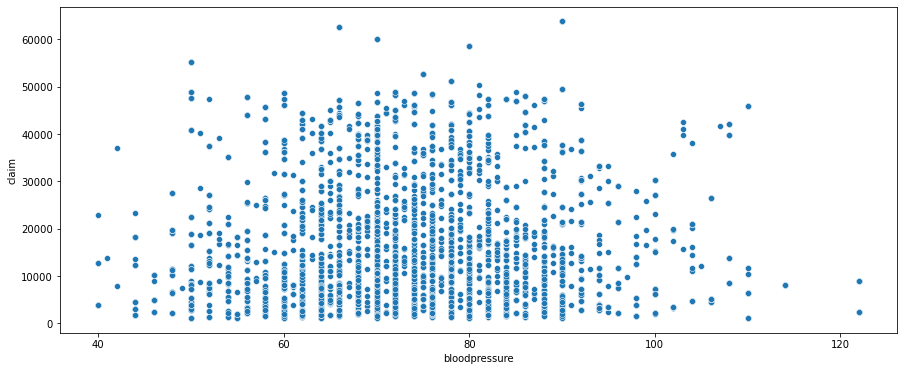

In [121]:
sns.scatterplot(df.bloodpressure,df.claim)

In [122]:
df.groupby('hereditary_diseases')['bloodpressure'].describe()

,count,mean,std,min,25%,50%,75%,max
hereditary_diseases,,,,,,,,
Alzheimer,144.0,72.652778,7.466774,58.0,68.0,72.0,78.00,88.0
Arthritis,96.0,73.864583,9.649238,59.0,68.0,69.0,82.00,98.0
Cancer,109.0,78.761468,9.634909,56.0,74.0,78.0,81.00,100.0
Diabetes,148.0,80.202703,13.890220,54.0,74.0,78.0,88.00,110.0
Epilepsy,84.0,76.523810,9.923170,44.0,66.0,74.0,85.25,90.0
EyeDisease,123.0,70.902439,11.320527,50.0,70.0,71.0,78.00,90.0
HeartDisease,93.0,69.053763,10.932963,50.0,62.0,66.0,76.00,86.0
High BP,69.0,70.115942,8.805974,60.0,64.0,72.0,72.00,88.0
NoDisease,13998.0,72.062652,11.264453,40.0,64.0,70.0,80.00,122.0


### Feature Engineering
* Target Encoded - Job title,city
* Basis BMI, create new var- Obese & Not Obese
* Diseses - Convert them in fatal and non-fatal
* Height using Weight and BMI

In [124]:
# bmi= w/(h**2)
df['height']=np.sqrt(df.weight/df.bmi)

In [125]:
df.head(2)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,height
0,60.0,male,64,24.3,NoDisease,1,0,8948.10,72,0,0,11882.0,13112.6,1.622882
1,49.0,female,75,22.6,NoDisease,1,0,9554.35,78,1,1,10097.0,9567.0,1.821698


In [128]:
# Fatal disease
df.hereditary_diseases.unique()
fatal = ['Cancer','Alzheimer','Diabetes','HeartDisease','High BP','Obesity']

In [129]:
def disease(x):
    if x in fatal:
        return('Fatal')
    else:
        return('Not Fatal')
        

In [130]:
df['disease_cat']=df.hereditary_diseases.apply(disease)

<AxesSubplot:xlabel='disease_cat', ylabel='claim'>

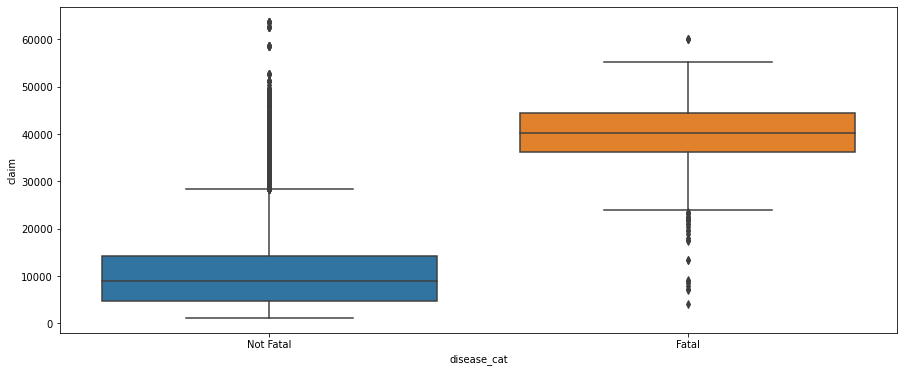

In [131]:
sns.boxplot(data=df,x='disease_cat',y='claim')

In [146]:
# drop the hereditary diseases
df.drop(columns='hereditary_diseases',axis=1,inplace=True)

In [139]:
# Finding underweight,Normal, overweight and obese

# Above 30 obese
# Underweight below 18.5
# 18.5-24.9 : Normal
# 25 - 30 : Overweight

def findingobese(x):
    if x<18.5:
        return('UW')
    elif x<24.9:
        return('normal')
    elif x<30:
        return('OW')
    else:
        return('obese')

In [141]:
df['bmi_cat']=df.bmi.apply(findingobese)

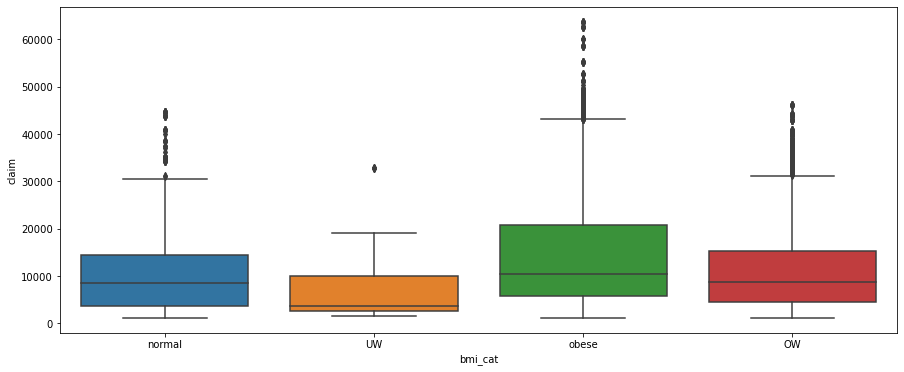

In [144]:
# Checking the effect using box plot
sns.boxplot(data=df,x='bmi_cat',y='claim')
plt.show()

In [147]:
df.head()

,age,sex,weight,bmi,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,height,disease_cat,bmi_cat
0,60.0,male,64,24.3,1,0,8948.10,72,0,0,11882.0,13112.6,1.622882,Not Fatal,normal
1,49.0,female,75,22.6,1,0,9554.35,78,1,1,10097.0,9567.0,1.821698,Not Fatal,normal
2,32.0,female,64,17.8,2,1,10247.90,88,1,1,8538.3,32734.2,1.896182,Not Fatal,UW
3,61.0,female,53,36.4,1,1,9510.25,72,1,0,8026.7,48517.6,1.206666,Not Fatal,obese
4,19.0,female,50,20.6,0,0,10968.80,82,1,0,12914.0,1731.7,1.557942,Not Fatal,normal


# Statistical Analysis

* Num vs Num - T-test
* Between Cat vs Num(tgt) ~ Annova

Note: there is litmus test for these test to be applied

* Litmus test is normality and equality of variance test
* If these litmus test fail, then we cannot apply the Paramteric Test(t-test and annova)
* We will have to apply the Non Parametric test (mannwhitneyu, kruskal)

In [148]:
df.select_dtypes(include = np.number).columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'city',
       'bloodpressure', 'diabetes', 'regular_ex', 'job_title', 'claim',
       'height'],
      dtype='object')

In [151]:
num_cols=['age', 'weight', 'bmi', 'city','bloodpressure', 'job_title', 'claim','height']

import scipy.stats as stats

for i in num_cols:
    print('P_value for',i,'is',stats.jarque_bera(df.loc[:,i]))
    
# Since Pvalue < 0.05, we reject the ho meaning data is not normal.
# so we reject the linear regression model

P_value for age is Jarque_beraResult(statistic=904.2842622775174, pvalue=0.0)
P_value for weight is Jarque_beraResult(statistic=673.4706964587922, pvalue=0.0)
P_value for bmi is Jarque_beraResult(statistic=398.4948562173053, pvalue=0.0)
P_value for city is Jarque_beraResult(statistic=16.595234366063263, pvalue=0.000249109703297723)
P_value for bloodpressure is Jarque_beraResult(statistic=777.0765520614292, pvalue=0.0)
P_value for job_title is Jarque_beraResult(statistic=1615.6266542787507, pvalue=0.0)
P_value for claim is Jarque_beraResult(statistic=6956.652395448131, pvalue=0.0)
P_value for height is Jarque_beraResult(statistic=789.514531248104, pvalue=0.0)


In [153]:
# Mannwhitney U
# Ho: That the feature does not carry any significance for the target
# Ha: That the feature is a Significant Var for the target

for i in num_cols:
    print(f'{i} using',stats.mannwhitneyu(df.loc[:,i],df.claim))  # num and num input
    
# Conc: Since the Pvalue for the city and jobtitle > 0.05, we fail to reject the claim 
# it means these variables ahev no significane for the target
# which leads to dropping these two variables before the final model building

age using MannwhitneyuResult(statistic=0.0, pvalue=0.0)
weight using MannwhitneyuResult(statistic=0.0, pvalue=0.0)
bmi using MannwhitneyuResult(statistic=0.0, pvalue=0.0)
city using MannwhitneyuResult(statistic=112790481.0, pvalue=0.6985287786125411)
bloodpressure using MannwhitneyuResult(statistic=0.0, pvalue=0.0)
job_title using MannwhitneyuResult(statistic=113391671.0, pvalue=0.23443311730968874)
claim using MannwhitneyuResult(statistic=112500000.0, pvalue=1.0)
height using MannwhitneyuResult(statistic=0.0, pvalue=0.0)


In [ ]:
# city,job_title >0.05 we drop the data

In [ ]:
# Similarity Test to annova - Kruskal Wallis test

# stats.kruskal(df.disease_cat,df.claim) # kruskal will not work for num and cat => only for num vs num
# if not possible to change the columns to num apply => Annova to check

In [154]:
df.disease_cat.unique()

array(['Not Fatal', 'Fatal'], dtype=object)

In [155]:
fatal=df.loc[df.disease_cat=='Fatal','claim']
nfatal=df.loc[df.disease_cat=='Not Fatal','claim']

stats.kruskal(fatal,nfatal)  # fatal vs claim 

KruskalResult(statistic=1618.6109621479138, pvalue=0.0)

In [156]:
fatal=df.loc[df.smoker==1,'claim']
nfatal=df.loc[df.smoker==0,'claim']

stats.kruskal(fatal,nfatal)  # smoker and claim

KruskalResult(statistic=6088.741565272118, pvalue=0.0)

* if p value >0.05 not important ,less than 0.05 important`

In [158]:
fatal=df.loc[df.diabetes==1,'claim']
nfatal=df.loc[df.diabetes==0,'claim']

stats.kruskal(fatal,nfatal)  # diabetes and claim

KruskalResult(statistic=223.69673390452843, pvalue=1.4127374338517292e-50)

In [159]:
df.head()

,age,sex,weight,bmi,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,height,disease_cat,bmi_cat
0,60.0,male,64,24.3,1,0,8948.10,72,0,0,11882.0,13112.6,1.622882,Not Fatal,normal
1,49.0,female,75,22.6,1,0,9554.35,78,1,1,10097.0,9567.0,1.821698,Not Fatal,normal
2,32.0,female,64,17.8,2,1,10247.90,88,1,1,8538.3,32734.2,1.896182,Not Fatal,UW
3,61.0,female,53,36.4,1,1,9510.25,72,1,0,8026.7,48517.6,1.206666,Not Fatal,obese
4,19.0,female,50,20.6,0,0,10968.80,82,1,0,12914.0,1731.7,1.557942,Not Fatal,normal


In [160]:
fatal=df.loc[df.regular_ex==0,'claim']
nfatal=df.loc[df.regular_ex==1,'claim']

stats.kruskal(fatal,nfatal)  # regualr _ex the pvalues>0.05 not important

KruskalResult(statistic=0.013707241603973554, pvalue=0.9067982990532341)

In [161]:
df.bmi_cat.unique()

array(['normal', 'UW', 'obese', 'OW'], dtype=object)

In [163]:
normal=df.loc[df.bmi_cat=='normal','claim']
UW=df.loc[df.bmi_cat=='UW','claim']
obese=df.loc[df.bmi_cat=='obese','claim']
OW=df.loc[df.bmi_cat=='OW','claim']


stats.kruskal(normal,UW,obese,OW)
# disease_cat, smoker,sex, diabets,bmi_cat
# Regular_ex should be dropped

KruskalResult(statistic=418.0453610415995, pvalue=2.7301731427506458e-90)

In [164]:
# Drop the insignificant variables
finaldata=df.drop(['job_title','city','regular_ex'],axis=1)

In [166]:
# apply pd.get_dummies ~ one hot encoding
finalcut = pd.get_dummies(finaldata,drop_first=True)

### Model Building
* Split the data in train and test
* Statistical model
* Ridge,lasso,enet model
* Interaction effect model
* SGD model
* K fold cross Validation model

In [169]:
finalcut.head()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,claim,height,sex_male,disease_cat_Not Fatal,bmi_cat_UW,bmi_cat_normal,bmi_cat_obese
0,60.0,64,24.3,1,0,72,0,13112.6,1.622882,1,1,0,1,0
1,49.0,75,22.6,1,0,78,1,9567.0,1.821698,0,1,0,1,0
2,32.0,64,17.8,2,1,88,1,32734.2,1.896182,0,1,1,0,0
3,61.0,53,36.4,1,1,72,1,48517.6,1.206666,0,1,0,0,1
4,19.0,50,20.6,0,0,82,1,1731.7,1.557942,0,1,0,1,0


In [171]:
y=finalcut['claim']
x=finalcut.drop(columns='claim',axis=1)

In [173]:
from sklearn.model_selection import KFold, train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=123)

In [174]:
# import linear regression and other models

from sklearn.linear_model import LinearRegression, Ridge,Lasso, ElasticNet, SGDRegressor
from statsmodels.api import OLS, add_constant
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [176]:
 # Linear Regression - Statistical MOdel
temp_xtrain= add_constant(xtrain)
temp_xtest= add_constant(xtest)

model = OLS(ytrain, temp_xtrain).fit()
# model.summary()

predictions_tr =  model.predict(temp_xtrain)
predictions_test = model.predict(temp_xtest)

In [178]:
rmse_train=np.sqrt(mean_squared_error(ytrain,predictions_tr))
rmse_test=np.sqrt(mean_squared_error(ytest,predictions_test))
print('RMSE Train', rmse_train)
print('RMSE Test',rmse_test)

# MAE (yi-yhat)/n
mae=mean_absolute_error(ytest,predictions_test)
print('MAE',mae)

# RMSE of 6000 is telling us that the model prediction is deviating by $6000

RMSE Train 6091.539601198498
RMSE Test 6126.921363392419
MAE 4060.2214343422024


In [179]:
# Ridge regression:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

params = ({'alpha':[0.001,0.01,0.1,0.5,0.9,1,2,3,5,7,9,10]})  # we need to give the value on our own

grid = GridSearchCV(estimator = ridge, param_grid = params, cv = 5)

grid.fit(x,y)
print(grid.best_params_)

{'alpha': 3}


In [181]:
ridge = Ridge(alpha=3,normalize=True)

model = ridge.fit(xtrain,ytrain)

predictions_tr =  model.predict(xtrain)
predictions_test = model.predict(xtest)

rmse_train=np.sqrt(mean_squared_error(ytrain,predictions_tr))
rmse_test=np.sqrt(mean_squared_error(ytest,predictions_test))
print('RMSE Train', rmse_train)
print('RMSE Test',rmse_test)

# MAE (yi-yhat)/n
mae=mean_absolute_error(ytest,predictions_test)
print('MAE',mae)

RMSE Train 9445.62780500786
RMSE Test 9769.96193653108
MAE 7301.2597430650985


In [182]:
# Lasso regression:

lasso = Lasso()

params = ({'alpha':[0.001,0.01,0.1,0.5,0.9,1,2,3,5,7,9,10]})  # we need to give the value on our own

grid = GridSearchCV(estimator = lasso, param_grid = params, cv = 5)


grid.fit(x,y)
print(grid.best_params_)

{'alpha': 0.5}


In [184]:
lasso = Lasso(alpha=0.5,normalize=True)

model = lasso.fit(xtrain,ytrain)

predictions_tr =  model.predict(xtrain)
predictions_test = model.predict(xtest)

rmse_train=np.sqrt(mean_squared_error(ytrain,predictions_tr))
rmse_test=np.sqrt(mean_squared_error(ytest,predictions_test))
print('RMSE Train', rmse_train)
print('RMSE Test',rmse_test)

# MAE (yi-yhat)/n
mae=mean_absolute_error(ytest,predictions_test)
print('MAE',mae)

RMSE Train 6093.237918970582
RMSE Test 6129.823071062265
MAE 4051.327260735816


In [186]:
# Elatic net
enet = ElasticNet()

model = enet.fit(xtrain,ytrain)
lasso = Lasso(alpha=1,normalize=True)

finalpred = lasso.fit(x,y).predict(dummytest)
predictions_tr =  model.predict(xtrain)
predictions_test = model.predict(xtest)

rmse_train=np.sqrt(mean_squared_error(ytrain,predictions_tr))
rmse_test=np.sqrt(mean_squared_error(ytest,predictions_test))
print('RMSE Train', rmse_train)
print('RMSE Test',rmse_test)

# MAE (yi-yhat)/n
mae=mean_absolute_error(ytest,predictions_test)
print('MAE',mae)

RMSE Train 9401.39780324071
RMSE Test 9653.720693266814
MAE 7458.7397631789


In [190]:
# SGD Regressor
sgd = SGDRegressor()

model = sgd.fit(xtrain,ytrain)

predictions_tr =  model.predict(xtrain)
predictions_test = model.predict(xtest)

rmse_train=np.sqrt(mean_squared_error(ytrain,predictions_tr))
rmse_test=np.sqrt(mean_squared_error(ytest,predictions_test))
print('RMSE Train', rmse_train)
print('RMSE Test',rmse_test)

# MAE (yi-yhat)/n
mae=mean_absolute_error(ytest,predictions_test)
print('MAE',mae)

RMSE Train 2956286123046.344
RMSE Test 2962229371839.707
MAE 2931241181870.326


In [189]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor()

model = gbm.fit(xtrain,ytrain)

predictions_tr =  model.predict(xtrain)
predictions_test = model.predict(xtest)

rmse_train=np.sqrt(mean_squared_error(ytrain,predictions_tr))
rmse_test=np.sqrt(mean_squared_error(ytest,predictions_test))
print('RMSE Train', rmse_train)
print('RMSE Test',rmse_test)

# MAE (yi-yhat)/n
mae=mean_absolute_error(ytest,predictions_test)
print('MAE',mae)

RMSE Train 4437.112287597708
RMSE Test 4518.320893180464
MAE 2690.4581771473504


In [194]:
# KFold

lr=LinearRegression()
gbm=GradientBoostingRegressor()
rmse=[]

kf = KFold(n_splits=5,shuffle=True,random_state=0)

for train_index, test_index in kf.split(x,y):
    kf_xtrain=x.loc[train_index]     # xtrain
    kf_xtest=x.loc[test_index]       # xtest
    kf_ytrain=y.loc[train_index]     # ytrain
    kf_ytest=y.loc[test_index]       # ytest
    #print(kf_xtrain.shape,kf_ytrain.shape,kf_xtest.shape,kf_ytest.shape)
    predictions= lr.fit(kf_xtrain,kf_ytrain).predict(xtest)
    #predictions= gbm.fit(kf_xtrain,kf_ytrain).predict(xtest)
    rmse.append(np.sqrt(mean_squared_error(ytest,predictions)))

np.mean(rmse)

6114.1507819705075

In [195]:
# After using kfold using gbm the error is sitll samae

gbm=GradientBoostingRegressor()
rmse=[]

kf = KFold(n_splits=5,shuffle=True,random_state=0)

for train_index, test_index in kf.split(x,y):
    kf_xtrain=x.loc[train_index]     # xtrain
    kf_xtest=x.loc[test_index]       # xtest
    kf_ytrain=y.loc[train_index]     # ytrain
    kf_ytest=y.loc[test_index]       # ytest
    #print(kf_xtrain.shape,kf_ytrain.shape,kf_xtest.shape,kf_ytest.shape)
    predictions= gbm.fit(kf_xtrain,kf_ytrain).predict(xtest)
    rmse.append(np.sqrt(mean_squared_error(ytest,predictions)))

np.mean(rmse)

4454.335129321608